In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

energy_df = pd.read_csv('../DataSets/Energy_Consumption_by_Sector_monthly.csv', index_col=None)
# Remove first row
energy_df = energy_df[1:]
energy_df.head()

,Month,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total
1,1973 January,1339.27,1957.641,657.977,1080.68,2027.033,2673.882,1504.805,1507.977,1691.096,3.693,7223.873
2,1973 February,1174.899,1712.143,623.759,1003.913,1841.299,2432.592,1438.298,1441.064,1511.458,2.654,6592.366
3,1973 March,983.374,1510.079,492.136,886.42,1926.411,2561.729,1561.293,1564.146,1559.159,-0.934,6521.439
4,1973 April,715.391,1183.421,363.393,736.851,1914.017,2540.02,1480.403,1483.064,1470.152,-1.627,5941.729
5,1973 May,535.914,1006.326,288.63,695.636,2076.468,2747.831,1622.115,1624.965,1551.631,-2.817,6071.94


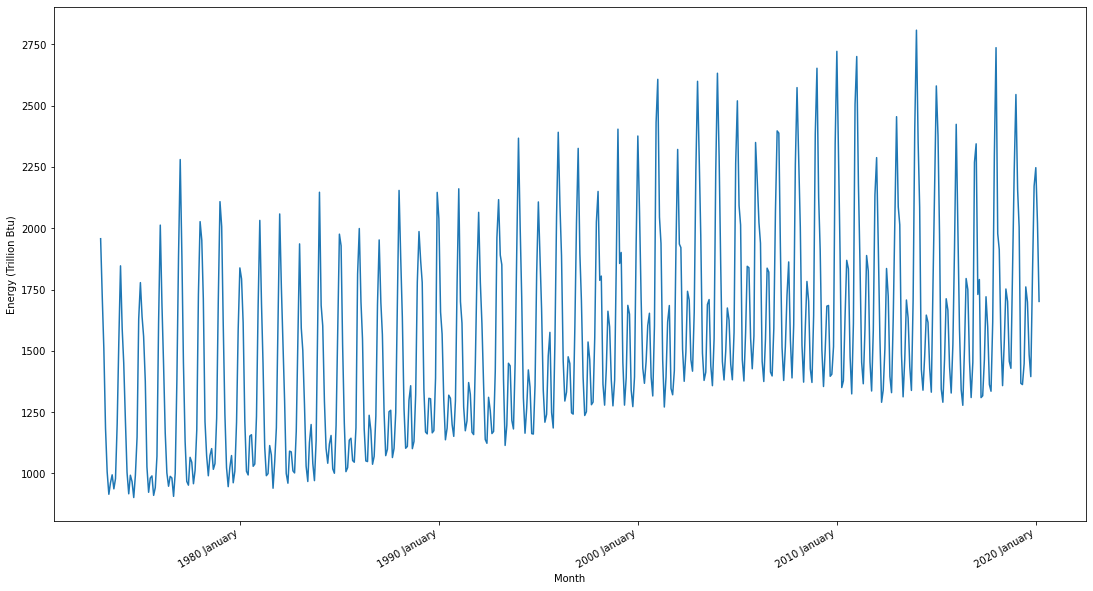

In [137]:
# A: Plot Total Energy Consumed by the Residential Sector per month

# Need to first convert data to numeric
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

energy_df["Total Energy Consumed by the Residential Sector"] = pd.to_numeric(energy_df["Total Energy Consumed by the Residential Sector"])
#ax1 = energy_df.plot(x="Month",y="Total Energy Consumed by the Residential Sector", figsize=(30,8))

ax1.plot(energy_df["Month"],energy_df["Total Energy Consumed by the Residential Sector"])

ax1.set_xlabel("Month")
ax1.set_ylabel("Energy (Trillion Btu)")
fig.autofmt_xdate()
fig.set_size_inches(18.5, 10.5)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))
plt.show()

Text(0, 0.5, 'Energy (Trillion Btu)')

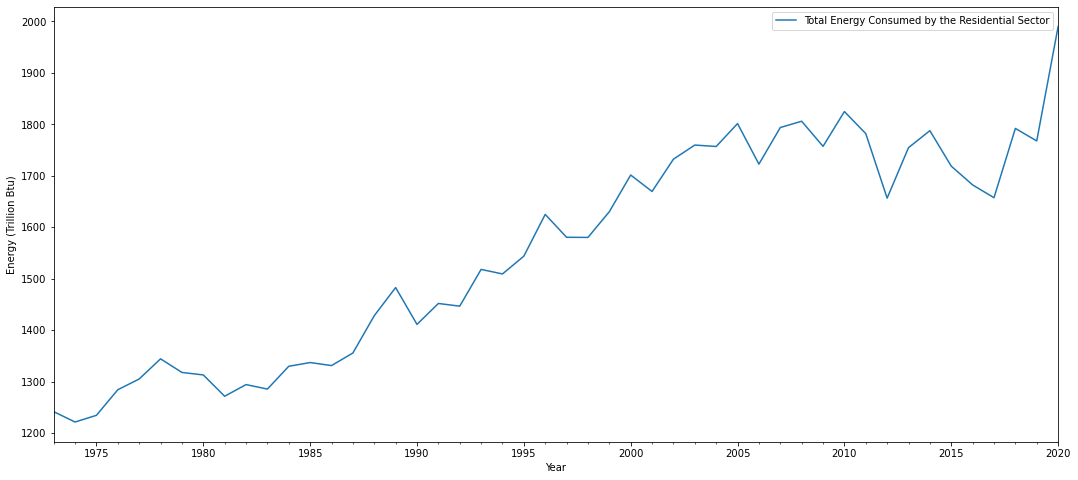

In [138]:
# B: Aggregate into yearly data and plot yearly values

# Need to convert to date time formatting to aggregate
energy_df["Month"] = pd.to_datetime(energy_df["Month"], format="%Y %B")

yearly_data = energy_df.groupby(pd.Grouper(key="Month", freq="Y")).mean()
ax = yearly_data.plot(figsize=(18,8))

ax.set_xlabel("Year")
ax.set_ylabel("Energy (Trillion Btu)")

# Part 2:

In [100]:
# Part 2A: Load wine dataset

from sklearn.datasets import load_wine

wine_data = load_wine()

In [101]:
# B: Apply MinMaxScaler()

from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler()

scaled_wine = minmax_scaler.fit_transform(wine_data.data)

In [102]:
# C: Apply StandardScaler()

standard_scaler = preprocessing.StandardScaler()

standard_wine = standard_scaler.fit_transform(wine_data.data)

In [127]:
# D: Apply the PCA library to C data

from sklearn.decomposition import PCA

# Creating PCA model that will preserve 90 percent of the variance in the data
pca_model = PCA(0.90)

# Fitting the standard wine data to the model
pca_model.fit(standard_wine)

# Transforming the data with the given model
wine_PCA = pca_model.transform(standard_wine)

print("Original: ",standard_wine.shape)
print("Transformed: ",wine_PCA.shape)

Original:  (178, 13)
Transformed:  (178, 8)


## Dimension Reduction number
The number of dimensions that the scaled wine can be reduced to is eight (8) dimensions from the original 13 dimensions. This will still capture 90 percent of the variance.